In [25]:
## import heirarchial clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
univ = pd.read_csv('Universities.csv')
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [4]:
univ.iloc[:,1:] ## univ column we dont want so we are droppping it here for cal

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [5]:
### normalization function## use sk learn libarary
## normalize formula = x-(x min)/[x max - x min] 


In [6]:
df=pd.DataFrame(univ)

In [7]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [8]:
minSAT = df['SAT'].min()
minSAT

1005

In [9]:
maxSAT =df['SAT'].max()
maxSAT

1415

In [10]:
normal_calculation =  (1310 - 1005)/(1005-1415)
normal_calculation
 ## below using python we calcuated. SAT =0.74 we got


-0.7439024390243902

In [11]:
#we will get max and min values using describe fun
univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [12]:
### normalization function## use sk learn libarary
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
    print(x)

In [13]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(univ.iloc[:,1:])
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


# dendrogram

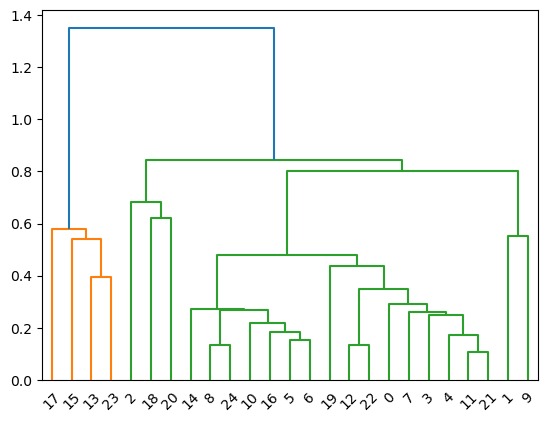

In [26]:
dendrogram= sch.dendrogram(sch.linkage(df_norm, method='average')) 
## we can use any linkage method. by fault we will get single linkage if we wont name complete or etc.

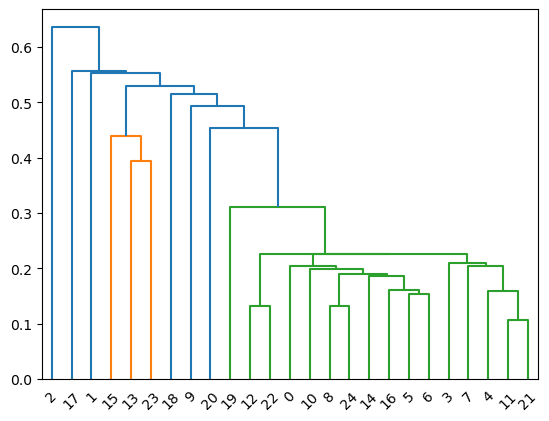

In [15]:
dendrogram= sch.dendrogram(sch.linkage(df_norm, method='single')) 

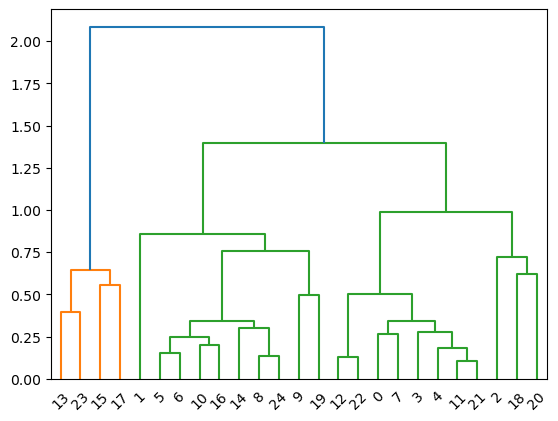

In [27]:
dendrogram= sch.dendrogram(sch.linkage(df_norm, method='complete')) 

# AGGLOMEARATIVE CLUSTERING

In [37]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3,metric ='euclidean', linkage = 'complete',distance_threshold=None)

In [38]:
#hc.fit(df_norm)
#hc.fit(df_norm)

In [39]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
## Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [40]:
set(y_hc)  ## its set of 3 clusters bcz we mentioned 3 

{0, 1, 2}

In [41]:
univ['h_clusterid'] = y_hc# its the code to attach 'h_clusterid' to univ 

In [42]:
univ ## here univ are moved 0,1,2 clusters based on its scores

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [43]:
univ1 = univ.sort_values('h_clusterid')
## Univ.iloc[;,[0,-1]]
univ1

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
22,UVA,1225,77,44,14,13349,92,0
21,UPenn,1285,80,36,11,27553,90,0
20,UMichigan,1180,65,68,16,15470,85,0
18,UCBerkeley,1240,95,40,17,15140,78,0
11,Northwestern,1260,85,39,11,28052,89,0
7,Georgetown,1255,74,24,12,20126,92,0
12,NotreDame,1255,81,42,13,15122,94,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0


In [44]:
univ1.groupby('h_clusterid').mean()

C:\Users\User\AppData\Local\Temp\ipykernel_7412\3442820345.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  univ1.groupby('h_clusterid').mean()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_clusterid,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000
